In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import gsw

In [42]:
import sys
sys.path.append("../BBTRE_physics_analysis/") 

In [43]:
import numpy as np
import xarray as xr

from xmitgcm import open_mdsdataset 
from xhistogram.xarray import histogram

from osse import *
from canyon_utils import *
from sloped_MITgcm import *

### Configuration parameters

In [44]:
# Constant parameters

Γ = 0.0008613659531090722
N = np.sqrt(g*α*Γ)
θ = 1.26E-3
f = -5.3e-5

h = 230
k0 = 5.2e-5
k1 = 1.8e-3

dx = 600.; dy = 600.
delta_t = 15.


### Load moment calculations

In [45]:
ds = xr.open_dataset("../../data/BBTRE-tracer/tracer_moments.nc")
ids = xr.open_dataset("../../data/BBTRE-tracer/subsampled_tracer_moments.nc")
ds_t = xr.open_dataset("../../data/BBTRE-tracer/time-approx_tracer_moments.nc")

In [46]:
tr_names = {1: "BBTRE", 2: "Crest", 3: "Bottom"}
tr_cols = {1: "C0", 2: "C4", 3: "C3"}

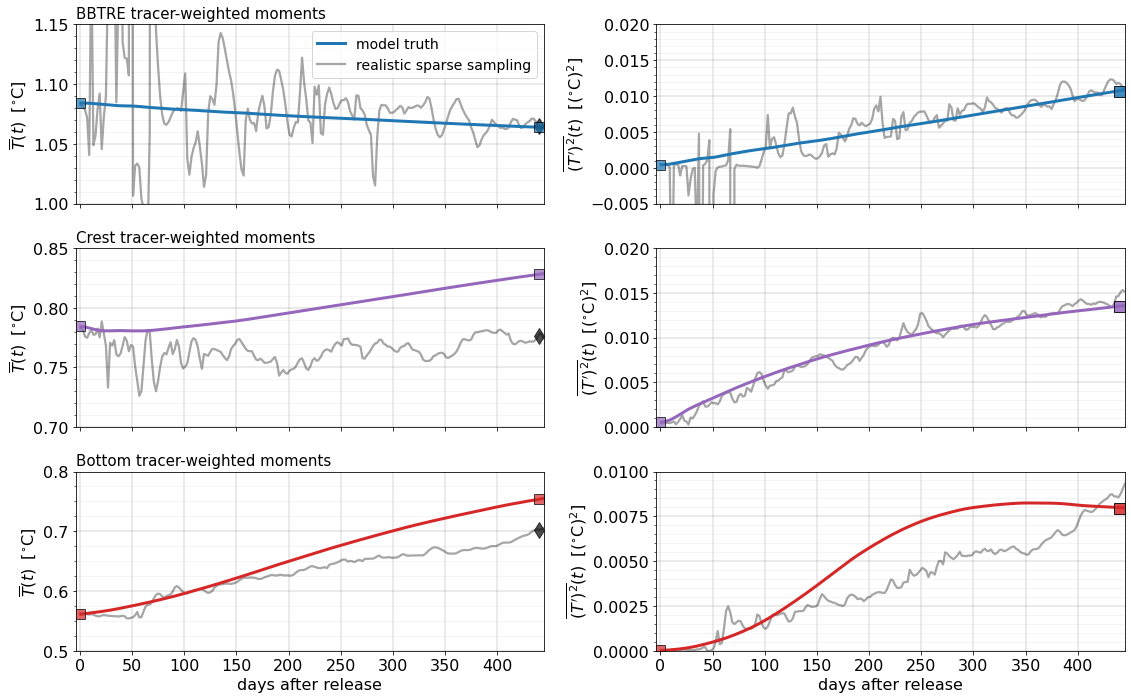

In [47]:
plt.figure(figsize=(16, 10))
for tr in [1,2,3]:
    ax = plt.subplot(3,2,1+(tr-1)*2)
    ids[f'θbar_Tr0{tr}'].plot(ax=ax, marker=None, linewidth=2.25, color="k", x="days", alpha=0.35)
    ds[f'θbar_Tr0{tr}'].plot(ax=ax, color=tr_cols[tr], lw=3, marker=None, x="days")
    ax.plot(440, ids[f'θbar_Tr0{tr}'].sel(time=ids.time[ids.days==439]), markeredgecolor="k", marker="d", linewidth=0, color='k', markersize=11, alpha=0.7)
    ax.plot(440, ds[f'θbar_Tr0{tr}'].sel(time=ds.time[ds.days==439]), markeredgecolor="k", marker="s", linewidth=0, color=tr_cols[tr], markersize=10, alpha=0.7)
    ax.plot(0, ds[f'θbar_Tr0{tr}'].sel(time=ds.time[ds.days==1]), markeredgecolor="k", marker="s", linewidth=0, color=tr_cols[tr], markersize=10, alpha=0.7)
    ax.set_xlim(-4, 445)
    ax.grid(True, alpha=0.15, which="minor")
    ax.grid(True, alpha=0.35, which="major", lw=1.5)
    ax.set_xlabel("days after release")
    ax.set_ylabel(fr"$\overline{{T}}(t)\;$ [$^{{\circ}}$C]")
    ax.set_title(f"{tr_names[tr]} tracer-weighted moments", loc="left", fontsize=15)
    if tr<3:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    
    ax = plt.subplot(3,2,tr*2)
    ids[f'θ2bar_Tr0{tr}'].plot(ax=ax, marker=None, linewidth=2.25, color="k", x="days", alpha=0.35)
    ds[f'θ2bar_Tr0{tr}'].plot(ax=ax, color=tr_cols[tr], lw=3, marker=None, x="days")
    ax.plot(440, (ids[f'θ2bar_Tr0{tr}'] - ids[f'θbar_Tr0{tr}']**2).sel(time=ids.time[ids.days==439]), markeredgecolor="k", marker="D", linewidth=0, color='k', markersize=10, alpha=0.7)
    ax.plot(440, ds[f'θ2bar_Tr0{tr}'].sel(time=ds.time[ds.days==439]), markeredgecolor="k", marker="s", linewidth=0, color=tr_cols[tr], markersize=11, alpha=0.85)
    ax.plot(0, ds[f'θ2bar_Tr0{tr}'].sel(time=ds.time[ds.days==1]), markeredgecolor="k", marker="s", linewidth=0, color=tr_cols[tr], markersize=10, alpha=0.7)
    ax.set_xlim(-4, 445)
    ax.grid(True, alpha=0.15, which="minor")
    ax.grid(True, alpha=0.35, which="major", lw=1.5)
    ax.set_xlabel("days after release")
    ax.set_ylabel(fr"$\overline{{(T')^{{2}}}}(t)\;$ [($^{{\circ}}$C$)^{{2}}$]")
    if tr<3:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    
ax = plt.subplot(3,2,1)
ax.set_yticks(np.arange(1, 1.2, 0.05))
ax.set_yticks(np.arange(1, 1.2, 0.01), minor=True)
ax.set_ylim(1, 1.15)
ax.plot([], [], color="C0", lw=3, label="model truth")
ax.plot([], [], color="k",  lw=2.25, alpha=0.35, label="realistic sparse sampling")
ax.legend(fontsize=14)

ax = plt.subplot(3,2,3)
ax.set_yticks(np.arange(0.7, 0.9, 0.05))
ax.set_yticks(np.arange(0.7, 0.9, 0.01), minor=True)
ax.set_ylim(0.7, 0.85)

ax = plt.subplot(3,2,5)
ax.set_yticks(np.arange(0.5, 0.9, 0.1))
ax.set_yticks(np.arange(0.5, 0.9, 0.025), minor=True)
ax.set_ylim(0.5, 0.8);

ax = plt.subplot(3,2,2)
ax.set_yticks(np.arange(-0.005, 0.025, 0.005))
ax.set_yticks(np.arange(-0.005, 0.025, 0.001), minor=True)
ax.set_ylim(-0.005, 0.02)

ax = plt.subplot(3,2,4)
ax.set_yticks(np.arange(0, 0.025, 0.005))
ax.set_yticks(np.arange(0, 0.021, 0.001), minor=True)
ax.set_ylim(0, 0.02)

ax = plt.subplot(3,2,6)
ax.set_yticks(np.arange(0, 0.0125, 0.0025))
ax.set_yticks(np.arange(0, 0.0105, 0.0005), minor=True)
ax.set_ylim(0, 0.01)

plt.tight_layout()
plt.savefig("../../figures/BBTRE-tracer/tracer_moments_subsampled.png", bbox_inches="tight", dpi=200.)

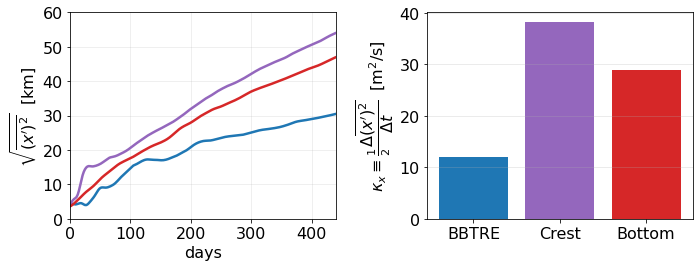

In [48]:
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
for tr in [1,2,3]:
    (np.sqrt(ds[f'X2bar_Tr0{tr}'])*1e-3).plot(x="days", label=tr_names[tr], color=tr_cols[tr], lw=2.5)
plt.ylabel(r"$\sqrt{\overline{(x')^{2}}}\;$ [km]")
plt.grid(True, alpha=0.25)
plt.xlim(0, 440)
plt.ylim(0, 60)

ax = plt.subplot(1,2,2)
ax.grid(True, alpha=0.3, axis="y")
for tr in [1,2,3]:
    ΔXp2 = ds[f'X2bar_Tr0{tr}'].sel(time=ds.time[ds.days==439]).values - ds[f'X2bar_Tr0{tr}'].sel(time=ds.time[ds.days==1]).values
    Δt = 438*86400
    κ_x = 0.5*ΔXp2/Δt
    ax.bar(tr, κ_x, color=tr_cols[tr])
ax.set_xticks([1,2,3])
ax.set_xticklabels(list(tr_names.values()));
ax.set_ylabel(r"$\kappa_{x} \equiv \frac{1}{2} \dfrac{\Delta \overline{(x')^{2}}}{\Delta t}\;$ [m$^{2}$/s]")

plt.tight_layout()
plt.savefig("../../figures/BBTRE-tracer/tracer_Xmoments.png", bbox_inches="tight", dpi=200.)

In [49]:
# Observations from Ledwell 2021 (see table)
observed_moments = {
    "time": np.array([0., 14.*30.4*86400.]),
    "first": np.array([45.9510, 45.9582]),
    "second": np.array([0.03e-4, 4.4e-4])
}

first_moment_tendency = np.diff(observed_moments["first"]) / np.diff(observed_moments["time"]) # density
centered_second_moment_tendency = 0.5*np.diff(observed_moments["second"]) / np.diff(observed_moments["time"]) # density

k_Taylor = 4.4e-4 # m^2/s
k_omega = 2.2e-5 # m^2/s

N4_av = 1.3e-12 # s^-2
α_obs = gsw.density.alpha(34., 1., 4000.)
dTdz_sq = (N4_av/((g*α_obs)**2))

# How much to scale obs by?
obs_scale = 1

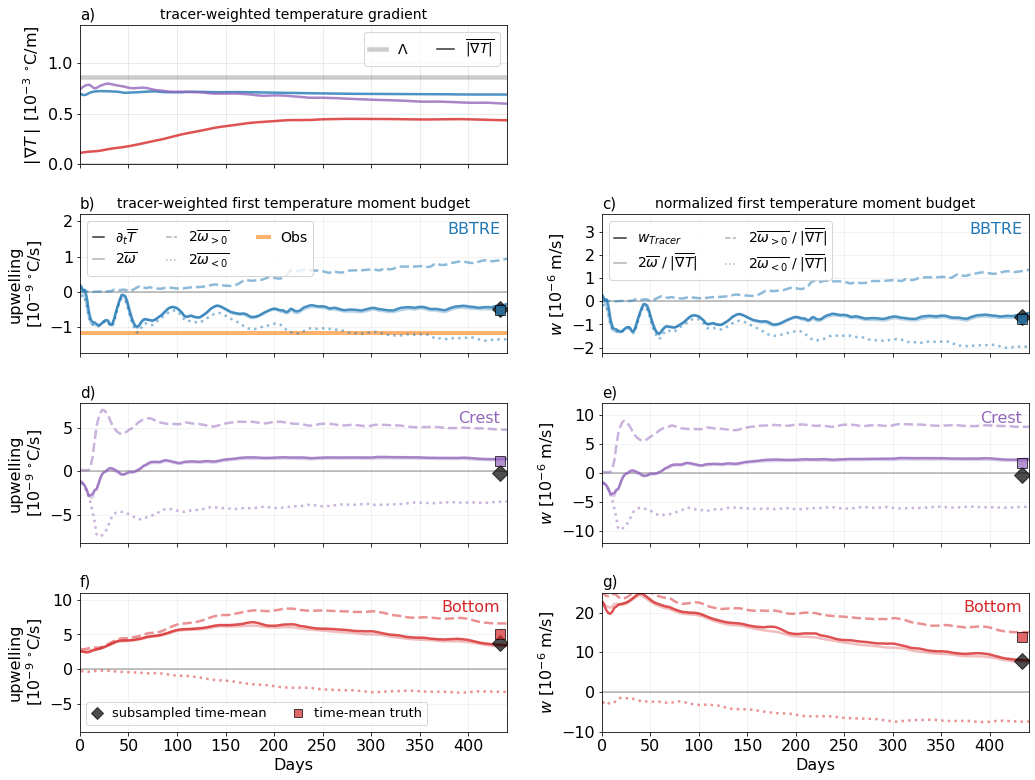

In [62]:
fig = plt.figure(figsize=(17,13))#, constrained_layout=True)
gs = fig.add_gridspec(4, 6, hspace=0.36, wspace=1.2)

axes = {
    "Γ": [fig.add_subplot(gs[0, :3])],
    "1": [fig.add_subplot(gs[1, :3]), fig.add_subplot(gs[2, :3]), fig.add_subplot(gs[3, :3])],
    "w": [fig.add_subplot(gs[1, 3:]), fig.add_subplot(gs[2, 3:]), fig.add_subplot(gs[3, 3:])],
}

ax = axes["Γ"][0]
ax.axhline(0., color="k", alpha=0.175, lw=1.5)
ax.axhline(1e3*Γ, color="k", alpha=0.2, lw=4.5, label=r"$\Lambda$", ls="-")
ax.plot([],[],"k-", label=r"$\overline{|\nabla T|}$", alpha=0.8)
ax.set_xticks(np.arange(0, 450, 50))
ax.set_xticklabels([])
ax.set_xlim(0, 440)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right", ncol=2, labelspacing=0.4, handlelength=1.2, fontsize=14)

for tr in [1,2,3]:
    ax = axes["Γ"][0]
    (1e3*ds[f"Gradθbar_Tr0{tr}"]).plot(ax=ax, lw=2.5, c=tr_cols[tr], ls="-", alpha=0.8, x="days")
    ax.set_ylabel(r"$|\, \nabla T\, |\,$ [$10^{-3}$ $^{\circ}$C/m]")
    ax.set_xlabel("")
    
### 1st moment
ax = axes["1"][0]
ax.plot([],[],"k-", label=r"$\partial_{t} \overline{T}$", alpha=0.8)
ax.plot([],[],"k-", alpha=0.3, label=r"$2\overline{\omega}$")
ax.plot([],[],"k--", alpha=0.3, label=r"$2\overline{\omega_{>0}}$")
ax.plot([],[],"k:", alpha=0.3, label=r"$2\overline{\omega_{<0}}$")

ax.axhline(1e9*first_moment_tendency/(-ρ0*α_obs)/obs_scale, label=f"Obs", color="C1", alpha=0.6, lw=4.)

ax.legend(loc="upper left", ncol=3, labelspacing=0.3, handlelength=0.8, fontsize=14)

for tr in [1,2,3]:
    ax = axes["1"][tr-1]
    ax.grid(True, alpha=0.2)
    ax.axhline(0., color="k", alpha=0.3, lw=1.5)
    ax.plot(ds.days, 1e9*ds[f"2ω_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls="-", alpha=0.3)
    ax.plot(ds.days, 1e9*2*ds[f"ωbar_BBL_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls="--", alpha=0.5)
    ax.plot(ds.days, 1e9*2*ds[f"ωbar_SML_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls=":", alpha=0.5)
    ax.plot(ds.days, 1e9*ds[f"d(θbar)dt_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls="-", alpha=0.8)
    
    dTdt_sample = (ids[f'θbar_Tr0{tr}'].sel(time=ids.days==439).values - ids[f'θbar_Tr0{tr}'].sel(time=ids.days==1).values) / (439*86400)
    ax.plot(433, 1e9*dTdt_sample, markeredgecolor="k", marker="D", linewidth=0, color="k", markersize=11, alpha=0.7)
    
    dTdt_truth = (ds[f'θbar_Tr0{tr}'].sel(time=ids.days==439).values - ds[f'θbar_Tr0{tr}'].sel(time=ids.days==1).values) / (439*86400)
    ax.plot(433, 1e9*dTdt_truth, markeredgecolor="k", marker="s", linewidth=0, color=tr_cols[tr], markersize=10, alpha=0.7)
    
    ax.set_xlim(0, 440)
    ax.set_ylabel("upwelling\n"+r"[$10^{-9}$ $^{\circ}$C/s]")
    ax.annotate(tr_names[tr], xy=(0.985, 0.86), xycoords="axes fraction", color=tr_cols[tr], horizontalalignment="right")
    if tr in [1,2]:
        ax.set_xticks(np.arange(0, 450, 50))
        ax.set_xticklabels([])
    else:
        ax.set_xticks(np.arange(0, 450, 50))
ax.set_xlabel("Days")


### w
ax = axes["w"][0]
ax.plot([],[],"k-", label=r"$w_{Tracer}$", alpha=0.8)
ax.plot([],[],"k-", alpha=0.3, label=r"$2\overline{\omega}\; / \;\left| \overline{\nabla T} \right|$")
ax.plot([],[],"k--", alpha=0.3, label=r"$2\overline{\omega_{>0}}\; / \;\left| \overline{\nabla T} \right|$")
ax.plot([],[],"k:", alpha=0.3, label=r"$2\overline{\omega_{<0}}\; / \;\left| \overline{\nabla T} \right|$")
ax.legend(loc="upper left", ncol=2, labelspacing=0.3, handlelength=0.8, fontsize=14)

for tr in [1,2,3]:
    ax = axes["w"][tr-1]
    ax.grid(True, alpha=0.2)
    ax.axhline(0., color="k", alpha=0.3, lw=1.5)
    ax.plot(ds.days, ds[f"2ω_Tr0{tr}"]/ds[f"Gradθbar_Tr0{tr}"]*1e6, lw=2.5, c=tr_cols[tr], ls="-", alpha=0.3)
    ax.plot(ds.days, 2*ds[f"ωbar_BBL_Tr0{tr}"]/ds[f"Gradθbar_Tr0{tr}"]*1e6, lw=2.5, c=tr_cols[tr], ls="--", alpha=0.5)
    ax.plot(ds.days, 2*ds[f"ωbar_SML_Tr0{tr}"]/ds[f"Gradθbar_Tr0{tr}"]*1e6, lw=2.5, c=tr_cols[tr], ls=":", alpha=0.5)
    ax.plot(ds.days, ds[f"d(θbar)dt_Tr0{tr}"]/ds[f"Gradθbar_Tr0{tr}"]*1e6, lw=2.5, c=tr_cols[tr], ls="-", alpha=0.8)
    
    dTdt_sample = (ids[f'θbar_Tr0{tr}'].sel(time=ids.days==439).values - ids[f'θbar_Tr0{tr}'].sel(time=ids.days==1).values) / (439*86400)
    w_sample = dTdt_sample / ids[f'dθdzbar_Tr0{tr}'].sel(time=ids.days==439).values
    ax.plot(433, 1e6*w_sample, markeredgecolor="k", marker="D", linewidth=0, color="k", markersize=11, alpha=0.7)
    
    dTdt_truth = (ds[f'θbar_Tr0{tr}'].sel(time=ids.days==439).values - ds[f'θbar_Tr0{tr}'].sel(time=ids.days==1).values) / (439*86400)
    w_truth = dTdt_truth / ds[f'Gradθbar_Tr0{tr}'].sel(time=ids.days<=440).mean('time').values
    ax.plot(433, 1e6*w_truth, markeredgecolor="k", marker="s", linewidth=0, color=tr_cols[tr], markersize=10, alpha=0.7)
    
    ax.set_xlim(0, 440)
    ax.set_ylabel(r"$w$ [10$^{-6}$ m/s]")
    ax.annotate(tr_names[tr], xy=(0.985, 0.86), xycoords="axes fraction", color=tr_cols[tr], horizontalalignment="right")
    if tr in [1,2]:
        ax.set_xticks(np.arange(0, 450, 50))
        ax.set_xticklabels([])
    else:
        ax.set_xticks(np.arange(0, 450, 50))
ax.set_xlabel("Days")

axes["Γ"][0].set_yticks(np.arange(0, 1.5, 0.5))
axes["Γ"][0].set_ylim(0, 1.6*1e3*Γ)

axes["1"][0].set_yticks(np.arange(-1, 3, 1))
axes["1"][0].set_ylim(-1.75, 2.2)
axes["1"][2].set_yticks(np.arange(-5, 15, 5))
axes["1"][2].set_ylim(-9, 11)

axes["w"][0].set_yticks(np.arange(-2, 4, 1))
axes["w"][0].set_ylim(-2.25, 3.75)
axes["w"][1].set_yticks(np.arange(-10, 20, 5))
axes["w"][1].set_ylim(-12, 12)
axes["w"][2].set_yticks(np.arange(-10, 30, 10))
axes["w"][2].set_ylim(-10, 25)

axes["Γ"][0].set_title("tracer-weighted temperature gradient", fontsize=14)
axes["1"][0].set_title("tracer-weighted first temperature moment budget", fontsize=14)
axes["w"][0].set_title("normalized first temperature moment budget", fontsize=14)

axes["1"][2].plot([], [], markeredgecolor="k", marker="D", linewidth=0, color="k", markersize=9, alpha=0.7, label="subsampled time-mean")
axes["1"][2].plot([], [], markeredgecolor="k", marker="s", linewidth=0, color=tr_cols[tr], markersize=8, alpha=0.7, label="time-mean truth")
axes["1"][2].legend(loc="lower left", ncol=2, labelspacing=0.3, handlelength=0.8, fontsize=13)

axes["Γ"][0].set_title("a)", loc="left", fontsize=15)
axes["1"][0].set_title("b)", loc="left", fontsize=15)
axes["w"][0].set_title("c)", loc="left", fontsize=15)
axes["1"][1].set_title("d)", loc="left", fontsize=15)
axes["w"][1].set_title("e)", loc="left", fontsize=15)
axes["1"][2].set_title("f)", loc="left", fontsize=15)
axes["w"][2].set_title("g)", loc="left", fontsize=15)

plt.savefig("../../figures/BBTRE-tracer/tracer_1st_moments.png", bbox_inches="tight", dpi=200.)

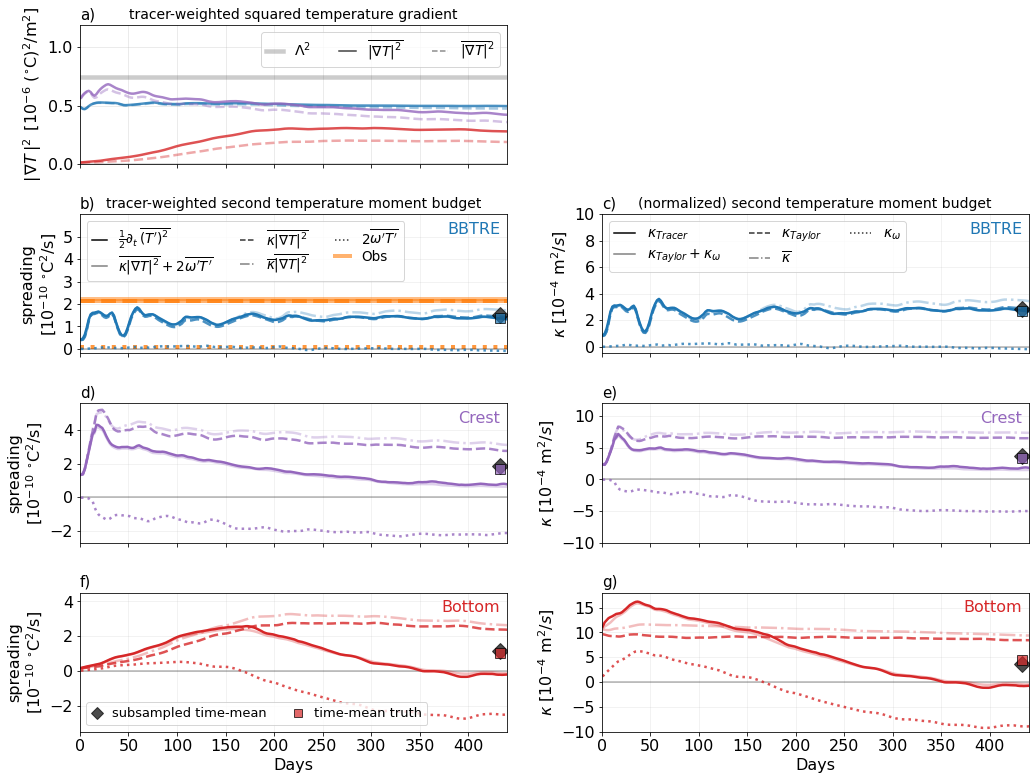

In [68]:
fig = plt.figure(figsize=(17,13))#, constrained_layout=True)
gs = fig.add_gridspec(4, 6, hspace=0.36, wspace=1.2)

axes = {
    "Γ": [fig.add_subplot(gs[0, :3])],
    "2": [fig.add_subplot(gs[1, :3]), fig.add_subplot(gs[2, :3]), fig.add_subplot(gs[3, :3])],
    "κ": [fig.add_subplot(gs[1, 3:]), fig.add_subplot(gs[2, 3:]), fig.add_subplot(gs[3, 3:])],
}

ax = axes["Γ"][0]
ax.axhline(0., color="k", alpha=0.175, lw=1.5)
ax.axhline(1e6*Γ**2, color="k", alpha=0.2, lw=4.5, label=r"$\Lambda^{2}$", ls="-")
ax.plot([],[],"k-", label=r"$\overline{|\nabla T|^{2}}$", alpha=0.75)
ax.plot([],[],"k--", label=r"$\overline{|\nabla T|}^{2}$", alpha=0.45)
ax.set_xticks(np.arange(0, 450, 50))
ax.set_xticklabels([])
ax.set_xlim(0, 440)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right", ncol=3, labelspacing=0.4, handlelength=1.2, fontsize=14)

for tr in [1,2,3]:
    ax = axes["Γ"][0]
    (1e6*ds[f"Gradθ**2bar_Tr0{tr}"]).plot(ax=ax, lw=2.5, c=tr_cols[tr], ls="-", alpha=0.8, x="days")
    (1e6*ds[f"Gradθbar_Tr0{tr}"]**2).plot(ax=ax, lw=2.5, c=tr_cols[tr], ls="--", alpha=0.4, x="days")
    ax.set_ylabel(r"$|\, \nabla T \,|^{2}\,$ [$10^{-6}$ ($^{\circ}$C)$^{2}$/m$^{2}$]")
    ax.set_xlabel("")

### 2nd moment
ax = axes["2"][0]
ax.plot([],[],"k-", label=r"$\frac{1}{2}\partial_{t}\, \overline{(T')^{2}}$")
ax.plot([],[],"k-", alpha=0.5, label=r"$\overline{\kappa |\nabla T|^{2}} + 2 \overline{\omega' T'}$")
ax.plot([],[],"k--", alpha=0.8, label=r"$\overline{\kappa |\nabla T|^{2}}$")
ax.plot([],[],"k-.", alpha=0.5, label=r"$\overline{\kappa} \overline{|\nabla T|^{2}}$")
ax.plot([],[],"k:", alpha=0.8, label=r"$2 \overline{\omega' T'}$")

ax.axhline(1e10*centered_second_moment_tendency/(-ρ0*α_obs)**2/obs_scale, label=f"Obs", color="C1", alpha=0.6, lw=4.)
ax.axhline(1e10*(k_Taylor+k_omega)*dTdz_sq/obs_scale, ls="-", color="C1", alpha=0.5, lw=4.)
ax.axhline(1e10*k_Taylor*dTdz_sq/obs_scale, ls="--", color="C1", alpha=0.8, lw=4.)
ax.axhline(1e10*k_omega*dTdz_sq/obs_scale, ls=":", color="C1", alpha=0.8, lw=4.)

ax.legend(loc="upper left", ncol=3, labelspacing=0.175, handlelength=1.1, fontsize=13.5)

for tr in [1,2,3]:
    ax = axes["2"][tr-1]
    ax.grid(True, alpha=0.2)
    ax.axhline(0., color="k", alpha=0.3, lw=1.5)
    ax.plot(ds.days, 1e10*(ds[f"κGradθ**2bar_Tr0{tr}"]+2*ds[f"_(ωpθp)bar_Tr0{tr}"]), lw=2.5, c=tr_cols[tr], ls="-", alpha=0.3)
    ax.plot(ds.days, 1e10*0.5*ds[f'd((θ-θbar)**2)bardt_Tr0{tr}'], lw=2.5, c=tr_cols[tr], ls="-")
    ax.plot(ds.days, 1e10*ds[f"κGradθ**2bar_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls="--", alpha=0.8)
    ax.plot(ds.days, 1e10*ds[f"κbar_Tr0{tr}"]*ds[f"Gradθ**2bar_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls="-.", alpha=0.3)
    ax.plot(ds.days, 1e10*2*ds[f"_(ωpθp)bar_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls=":", alpha=0.8)
    
    dT2dt_sample = (ids[f'θ2bar_Tr0{tr}'].sel(time=ids.days==439).values - ids[f'θ2bar_Tr0{tr}'].sel(time=ids.days==1).values) / (439*86400)
    ax.plot(433, 1e10*0.5*dT2dt_sample, markeredgecolor="k", marker="D", linewidth=0, color="k", markersize=11, alpha=0.7)
    
    dT2dt_truth = (ds[f'θ2bar_Tr0{tr}'].sel(time=ids.days==439).values - ds[f'θ2bar_Tr0{tr}'].sel(time=ids.days==1).values) / (439*86400)
    ax.plot(433, 1e10*0.5*dT2dt_truth, markeredgecolor="k", marker="s", linewidth=0, color=tr_cols[tr], markersize=10, alpha=0.7)
    
    ax.set_xlim(0, 440)
    #ax.set_ylim(2e5*-10*k0, 1e5*1.1*k1)
    ax.set_ylabel("spreading\n"+r"[10$^{-10}$ $^{\circ}$C$^{2}$/s]")
    ax.annotate(tr_names[tr], xy=(0.985, 0.86), xycoords="axes fraction", color=tr_cols[tr], horizontalalignment="right")
    if tr in [1,2]:
        ax.set_xticks(np.arange(0, 450, 50))
        ax.set_xticklabels([])
    else:
        ax.set_xticks(np.arange(0, 450, 50))
ax.set_xlabel("Days")

### k
ax = axes["κ"][0]
ax.plot([],[],"k-", label=r"$\kappa_{Tracer}$")
ax.plot([],[],"k-", alpha=0.5, label=r"$κ_{Taylor} + κ_{ω}$")
ax.plot([],[],"k-", alpha=0.5, label="")
ax.plot([],[],"k--", alpha=0.8, label=r"$κ_{Taylor}$")
ax.plot([],[],"k-.", alpha=0.5, label=r"$\overline{κ}$")
ax.plot([],[],"k:", alpha=0.8, label=r"$κ_{ω}$")
ax.legend(loc="upper left", ncol=3, labelspacing=0.4, handlelength=1.5, fontsize=14)

for tr in [1,2,3]:
    ax = axes["κ"][tr-1]
    ax.grid(True, alpha=0.2)
    ax.axhline(0., color="k", alpha=0.3, lw=1.5)
    ax.plot(ds.days, 1e4*(ds[f"κTaylor_Tr0{tr}"]+ds[f"κOmega_Tr0{tr}"]), lw=2.5, c=tr_cols[tr], ls="-", alpha=0.3)
    ax.plot(ds.days, 1e4*ds[f"κTracer_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls="-")
    ax.plot(ds.days, 1e4*ds[f"κTaylor_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls="--", alpha=0.8)
    ax.plot(ds.days, 1e4*ds[f"κbar_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls="-.", alpha=0.3)
    ax.plot(ds.days, 1e4*ds[f"κOmega_Tr0{tr}"], lw=2.5, c=tr_cols[tr], ls=":", alpha=0.8)
    
    dT2dt_sample = (ids[f'θ2bar_Tr0{tr}'].sel(time=ids.days==439).values - ids[f'θ2bar_Tr0{tr}'].sel(time=ids.days==1).values) / (439*86400)
    κ_sample = 0.5*dT2dt_sample / ids[f'dθdz**2bar_Tr0{tr}'].sel(time=ids.days==439).values
    ax.plot(433, 1e4*κ_sample, markeredgecolor="k", marker="D", linewidth=0, color="k", markersize=11, alpha=0.7)
    
    dT2dt_truth = (ds[f'θ2bar_Tr0{tr}'].sel(time=ids.days==439).values - ds[f'θ2bar_Tr0{tr}'].sel(time=ids.days==1).values) / (439*86400)
    κ_truth = 0.5*dT2dt_truth / ds[f'Gradθ**2bar_Tr0{tr}'].sel(time=ids.days<=440).mean('time').values
    ax.plot(433, 1e4*κ_truth, markeredgecolor="k", marker="s", linewidth=0, color=tr_cols[tr], markersize=10, alpha=0.7)
    
    ax.set_xlim(0, 440)
    ax.set_ylim(2e4*-10*k0, 1e4*1.1*k1)
    ax.set_ylabel(r"$κ$ [10$^{-4}$ m$^{2}/s$]")
    ax.annotate(tr_names[tr], xy=(0.985, 0.86), xycoords="axes fraction", color=tr_cols[tr], horizontalalignment="right")
    if tr in [1,2]:
        ax.set_xticks(np.arange(0, 450, 50))
        ax.set_xticklabels([])
    else:
        ax.set_xticks(np.arange(0, 450, 50))
ax.set_xlabel("Days")

axes["Γ"][0].set_yticks(np.arange(0, 2, 0.5))
axes["Γ"][0].set_ylim(0, 1.6*1e6*(Γ**2))

axes["2"][0].set_yticks(np.arange(0, 6, 1))
axes["2"][0].set_ylim(-0.2, 6)
axes["2"][1].set_yticks(np.arange(-2, 6, 2))
axes["2"][2].set_yticks(np.arange(-2, 6, 2))
axes["2"][2].set_ylim(-3.5, 4.5)

axes["κ"][0].set_yticks(np.arange(0, 12, 2))
axes["κ"][0].set_ylim(-0.5, 10)
axes["κ"][1].set_yticks(np.arange(-10, 15, 5))
axes["κ"][1].set_ylim(-10, 12)
axes["κ"][2].set_yticks(np.arange(-10, 20, 5))
axes["κ"][2].set_ylim(-10, 18)

axes["Γ"][0].set_title("tracer-weighted squared temperature gradient", fontsize=14)
axes["2"][0].set_title("tracer-weighted second temperature moment budget", fontsize=14)
axes["κ"][0].set_title("(normalized) second temperature moment budget", fontsize=14)

axes["2"][2].plot([], [], markeredgecolor="k", marker="D", linewidth=0, color="k", markersize=9, alpha=0.7, label="subsampled time-mean")
axes["2"][2].plot([], [], markeredgecolor="k", marker="s", linewidth=0, color=tr_cols[tr], markersize=8, alpha=0.7, label="time-mean truth")
axes["2"][2].legend(loc="lower left", ncol=2, labelspacing=0.3, handlelength=0.8, fontsize=13)

axes["Γ"][0].set_title("a)", loc="left", fontsize=15)
axes["2"][0].set_title("b)", loc="left", fontsize=15)
axes["κ"][0].set_title("c)", loc="left", fontsize=15)
axes["2"][1].set_title("d)", loc="left", fontsize=15)
axes["κ"][1].set_title("e)", loc="left", fontsize=15)
axes["2"][2].set_title("f)", loc="left", fontsize=15)
axes["κ"][2].set_title("g)", loc="left", fontsize=15)

plt.savefig("../../figures/BBTRE-tracer/tracer_2nd_moments.png", bbox_inches="tight", dpi=200.)

In [24]:
κobs = (centered_second_moment_tendency/(-ρ0*α_obs)**2)/dTdz_sq

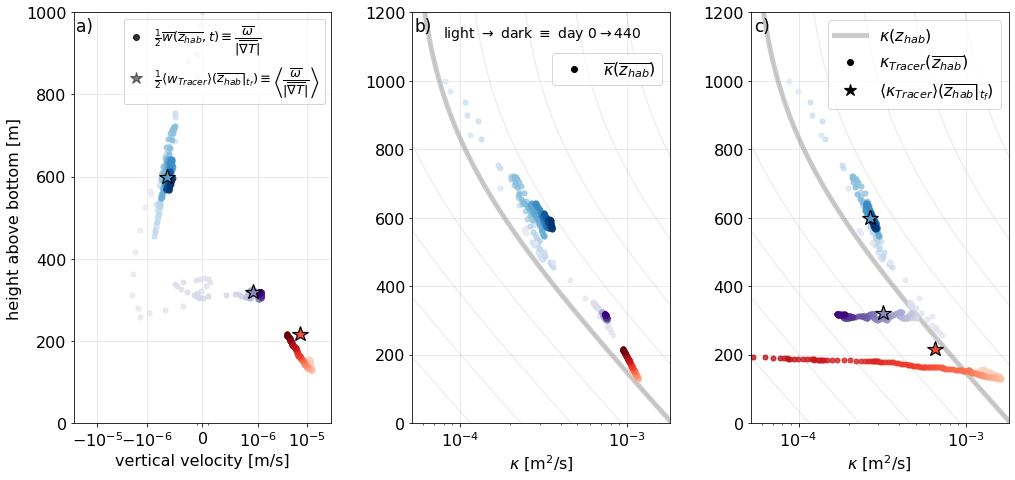

In [25]:
fig = plt.figure(figsize=(14,6.5), constrained_layout=True)
gs = fig.add_gridspec(1, 3, hspace=0.36, wspace=0.1)

axes = {
    "hab": [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2])],
}



### hab
nt = 440//2
zplot = np.arange(0, 1500., 1.)

cmaps = [
    None,
    matplotlib.cm.get_cmap("Blues"),
    matplotlib.cm.get_cmap("Purples"),
    matplotlib.cm.get_cmap("Reds")
]

Ly = 600.*100.
wmt = xr.open_dataset("../../data/BBTRE-physics/wmt_total.nc")

#
ax = axes["hab"][0]
ax.grid(True, alpha=0.3)
w_hab = (wmt["E_hab"]/wmt["dZ_habC_bin"]).mean("time")*(np.sin(θ)/Ly)
#w_hab.plot(ax=ax, y="Z_habC_bin", lw=5., color="grey", alpha=0.4, label=r"$\dfrac{\sin{\theta}}{L_{y}} \; \dfrac{\partial \mathcal{E}}{\partial (hab)}$")
for tr in [1,2,3]:
    for t in range(0, nt):
        ax.plot(
            (0.5*ds[f'2ω_Tr0{tr}'][t])/(ds[f'Gradθbar_Tr0{tr}'][t]),
            ds[f'HABbar_Tr0{tr}'][t],
            color=cmaps[tr](0.15+0.85*ds['days'][t].values/(nt*2)),
            markersize=5,
            marker="o",
            alpha=0.8
        )
for tr in [1,2,3]:
    ax.plot(
        ((0.5*ds[f'2ω_Tr0{tr}'])/ds[f'Gradθbar_Tr0{tr}']).isel(time=slice(0, nt)).mean(),
        ds[f'HABbar_Tr0{tr}'][nt],
        color=cmaps[tr](0.15+0.85*ds['days'][nt//2].values/(nt*2)),
        marker="*",
        markersize=16,
        markeredgecolor="k",
        markeredgewidth=1.2,
        alpha=1.
    )
ax.plot([], [], "ko", alpha=0.8, label=r"$\frac{1}{2}\overline{w}(\overline{z_{hab}}, t) \equiv \dfrac{\overline{\omega}}{|\overline{\nabla T}|}$")
ax.plot([], [], "k*", alpha=0.5,
        label=r"$\frac{1}{2}\langle w_{Tracer} \rangle (\overline{z_{hab}}|_{t_{f}}) \equiv \left\langle \dfrac{ \overline{\omega}}{|\overline{\nabla T}|} \right\rangle$",
        markersize=12, markeredgecolor="k", markeredgewidth=1.2)
ax.set_xscale('symlog', linthresh=1e-7, linscale=0.1)
ax.set_xticks([-1e-5, -1e-6, 0, 1e-6, 1e-5])
ax.set_ylim(0, 1000)
ax.set_xlim(-3e-5, 3e-5)
ax.set_title("")
ax.legend(handlelength=1.1, loc="upper right", fontsize=13)
ax.set_ylabel("height above bottom [m]")
ax.set_xlabel("vertical velocity [m/s]")

# k
ax = axes["hab"][1]
ax.grid(True, alpha=0.3)
ax.semilogx(k0+k1*np.exp(-zplot/h), zplot, lw=5, c="grey", alpha=0.4)
for power in [-4, -3, -2, -1, 0, 1, 2, 3, 4]:
    ax.semilogx((2**power)*(k0+k1*np.exp(-zplot/h)), zplot, lw=1.25, c="grey", alpha=0.15)
ax.set_title("")
for tr in [1,2,3]:
    for t in range(0, nt):
        ax.semilogx(
            ds[f'κbar_Tr0{tr}'][t],
            ds[f'HABbar_Tr0{tr}'][t],
            color=cmaps[tr](0.15+0.85*ds['days'][t].values/(nt*2)),
            markersize=5,
            marker="o",
            alpha=0.8,
        )
ax.plot([], [], "ko", label=r"$\overline{κ}(\overline{z_{hab}})$")
ax.set_xlim(k0, k1)
ax.set_ylim(0, 1200)
ax.set_xlabel(r"$κ$ [m$^{2}$/s]")
ax.annotate(r"light $\rightarrow$ dark $\equiv$ day $0 \rightarrow 440$", xy=(0.12, 0.94), xycoords="axes fraction", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(0., 0., 1.0, 0.92))

ax = axes["hab"][2]
ax.grid(True, alpha=0.3)
ax.semilogx(k0+k1*np.exp(-zplot/h), zplot, lw=5, c="grey", alpha=0.4, label=r"$\kappa(z_{hab})$")
for power in [-4, -3, -2, -1, 0, 1, 2, 3, 4]:
    ax.semilogx((2**power)*(k0+k1*np.exp(-zplot/h)), zplot, lw=1.25, c="grey", alpha=0.15)
ax.set_title("")
for tr in [1,2,3]:
    for t in range(0, nt):
        ax.semilogx(
            ds[f'κTracer_Tr0{tr}'][t],
            ds[f'HABbar_Tr0{tr}'][t],
            color=cmaps[tr](0.15+0.85*ds['days'][t].values/(nt*2)),
            markersize=5,
            marker="o",
            alpha=0.8
        )
for tr in [1,2,3]:
    ax.plot(
        ds[f'κTracer_Tr0{tr}'].isel(time=slice(0, nt)).mean(),
        ds[f'HABbar_Tr0{tr}'][nt],
        color=cmaps[tr](0.15+0.85*ds['days'][nt//2].values/(nt*2)),
        marker="*",
        markersize=16,
        markeredgecolor="k",
        markeredgewidth=1.2,
        alpha=1.
    )
ax.plot([], [], "ko", label=r"$κ_{Tracer}(\overline{z_{hab}})$")
ax.plot([], [], "k*", label=r"$\langle κ_{Tracer} \rangle (\overline{z_{hab}}|_{t_{f}})$",
        markersize=12, markeredgecolor="k", markeredgewidth=1.2)
ax.set_xlim(k0, k1)
ax.set_ylim(0, 1200)
ax.set_xlabel(r"$κ$ [m$^{2}$/s]")
ax.legend(loc="upper right")

axes["hab"][0].set_title("a)", loc="left", x=0.01,  y=0.94, fontsize=17)
axes["hab"][1].set_title("b)", loc="left", x=0.01,  y=0.94, fontsize=17)
axes["hab"][2].set_title("c)", loc="left", x=0.01, y=0.94, fontsize=17)

plt.savefig("../../figures/BBTRE-tracer/tracer_moments_hab.png", bbox_inches="tight", dpi=200.)

In [25]:
z_hab = w_hab['Z_habC_bin']

def H(z, z0, h, option="box"):
    if option=="box":
        return np.logical_and(z >= z0-h/2, z < z0+h/2)
    elif option=="gauss":
        return np.exp(-(z - z0)**2/((h/2)**2))
    elif option=="exp":
        return np.exp(-np.abs((z-z0)/(h/2)))

In [26]:
def w_hab_convolve(w, z, h, option="box"):
    dz = z.diff("Z_habC_bin")
    w_bar, z_bar = xr.zeros_like(z), xr.zeros_like(z)
    for (k, z0) in enumerate(z):
        w_bar[k] = (dz*H(z, z0, h, option=option)*w).sum("Z_habC_bin") / (dz*H(z, z0, h, option=option)).sum("Z_habC_bin")
        z_bar[k] = (dz*H(z, z0, h, option=option)*z).sum("Z_habC_bin") / (dz*H(z, z0, h, option=option)).sum("Z_habC_bin")
    return w_bar, z_bar

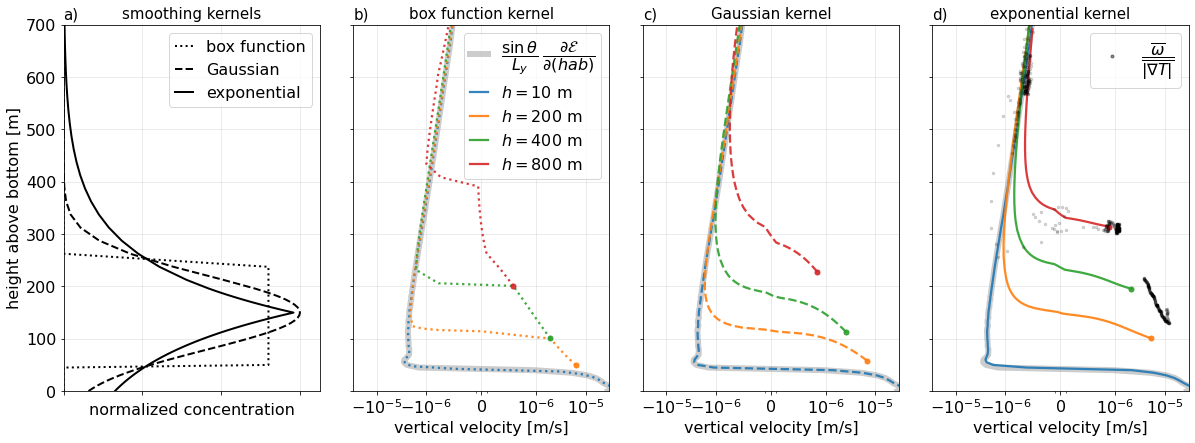

In [27]:
fig = plt.figure(figsize=(16.5,6), constrained_layout=True)
gs = fig.add_gridspec(1, 4, hspace=0.36, wspace=0.1)

axes = {
    "hab": [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2]), fig.add_subplot(gs[0, 3])],
}

panel_labels = ["a)", "b)", "c)", "d)"]

options = ["box", "gauss", "exp"]
long_options = ["box function", "Gaussian", "exponential"]
linestyles = [":", "--", "-"]

ax=axes["hab"][0]
ax.grid(True, alpha=0.3)
    
dz_hab = z_hab.diff("Z_habC_bin")
z0 = 150
h = 200

for option, long_option, linestyle in zip(options, long_options, linestyles):
    (H(z_hab, z0, h, option=option)/(dz_hab*H(z_hab, z0, h, option=option)).sum("Z_habC_bin")).plot(ax=ax, y="Z_habC_bin", color="k", linestyle=linestyle, lw=2., label=long_option)
ax.set_xlim(0, 0.0065)
ax.set_ylim(0, 700)
ax.set_xticklabels([])
ax.set_xlabel("normalized concentration")
ax.set_ylabel("height above bottom [m]")
ax.set_title("smoothing kernels", fontsize=15)
ax.set_title(f"{panel_labels[0]}", loc="left", fontsize=15)
ax.legend(handlelength=1.1, loc="upper right", fontsize=16)

colors = ["C0", "C1", "C2", "C3"]
for panel, option in enumerate(options, start=1):
    ax = axes["hab"][panel]
    ax.grid(True, alpha=0.3)
    label = r"$\dfrac{\sin{\theta}}{L_{y}} \; \dfrac{\partial \mathcal{E}}{\partial (hab)}$"
    if panel>1:
        label=None
    w_hab.plot(ax=ax, y="Z_habC_bin", lw=6., color="grey", alpha=0.4, label=label)

    for hidx, h in enumerate([10, 200, 400, 800]):
        
        label = fr"$h = {h}$ m"
        if panel>1:
            label=None
        
        wbar, zbar = w_hab_convolve(w_hab, z_hab, h, option=option)
        ax.plot(wbar, zbar, lw=2.25, alpha=0.9, color=colors[hidx], linestyle=linestyles[panel-1])
        ax.plot([wbar[0]], [zbar[0]], lw=2.25, alpha=0.9, color=colors[hidx], marker="o", markersize=5)
        ax.plot([], [], lw=2.25, alpha=0.9, color=colors[hidx], linestyle="-", label=label)

    ax.set_xscale('symlog', linthresh=1e-7, linscale=0.1)
    ax.set_xticks([-1e-5, -1e-6, 0, 1e-6, 1e-5])
    ax.set_ylim(0, 700)
    ax.set_xlim(-3e-5, 3e-5)
    ax.set_title("")
    if panel==1:
        ax.legend(handlelength=1.1, loc="upper right", fontsize=16)
    ax.set_yticklabels([])
    ax.set_ylabel("")
    ax.set_xlabel("vertical velocity [m/s]")
    ax.set_title(f"{long_options[panel-1]} kernel", fontsize=15)
    ax.set_title(f"{panel_labels[panel]}", loc="left", fontsize=15)
    
ax = axes["hab"][3]
for tr in [1,2,3]:
    for t in range(0, nt):
        ax.plot(
            (0.5*ds[f'2ω_Tr0{tr}'][t])/(ds[f'Gradθbar_Tr0{tr}'][t]),
            ds[f'HABbar_Tr0{tr}'][t],
            color="k",
            markersize=5,
            marker=".",
            alpha=0.15
        )
ax.plot([], [], lw=0., color="k", markersize=6, marker=".", alpha=0.45, label=r"$\dfrac{\overline{\omega}}{\overline{|\nabla T|}}$")
ax.legend()
    
plt.savefig("../../figures/BBTRE-tracer/w_smoothing_kernels.png", bbox_inches="tight", dpi=200.)

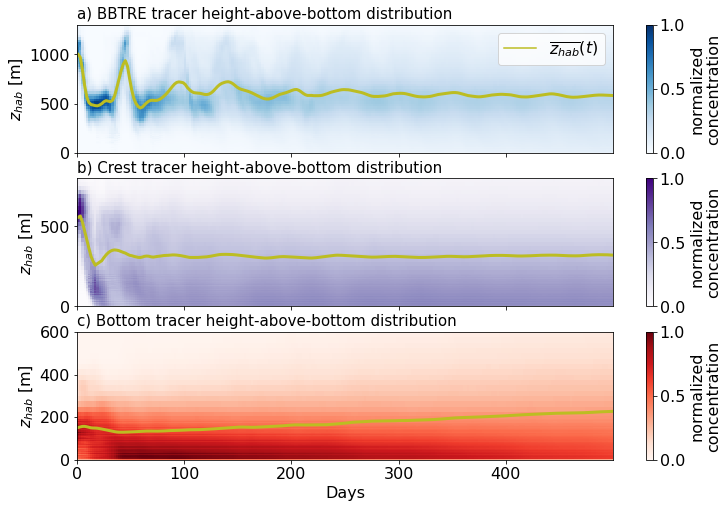

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(12,8))
ymax = [1300, 800, 600]
colors = ["Blues", "Purples", "Reds"]

for tr in [1,2,3]:
    ax = axes[tr-1]
    c_hab = ds[f"M_Tr0{tr}_hab"]/ds["dZ_habC_bin"]
    c_hab /= c_hab.max()
    PC = c_hab.plot(ax=ax, x="days", cmap=colors[tr-1], vmin=0, vmax=1, extend="neither")
    PC.colorbar.set_label("normalized\nconcentration")
    ds[f"HABbar_Tr0{tr}"].plot(ax=ax, x="days", color="C8", lw=3., alpha=1.)
    ax.set_ylim(0, ymax[tr-1])
    ax.set_ylabel("$z_{hab}$ [m]")
    ax.set_xlabel("")
    ax.set_xticks(np.arange(0,500,100))
    ax.set_xticklabels([])

ax = axes[0]
ax.set_title("a) BBTRE tracer height-above-bottom distribution", loc="left", fontsize=15)
ax.plot([], [], "-C8", label=r"$\overline{z_{hab}}(t)$")
ax.legend(loc="upper right")
ax = axes[1]
ax.set_title("b) Crest tracer height-above-bottom distribution", loc="left", fontsize=15)
ax = axes[2]
ax.set_title("c) Bottom tracer height-above-bottom distribution", loc="left", fontsize=15)
ax.set_xticks(np.arange(0,500,100))
ax.set_xticklabels(np.arange(0,500,100))
ax.set_xlabel("Days")

plt.savefig("../../figures/BBTRE-tracer/S_hab-distribution.png", bbox_inches="tight", dpi=200.)